<a href="https://colab.research.google.com/github/nasyawa/PCVK_GANJIL_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Akses folder images pd GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Formula : g(x,y)=f(x,y)+b

g(xy)=> nilai pixel setelah transformasi

f(x,y)=> nilai pixel asli

b= nilai brightness

In [3]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 90


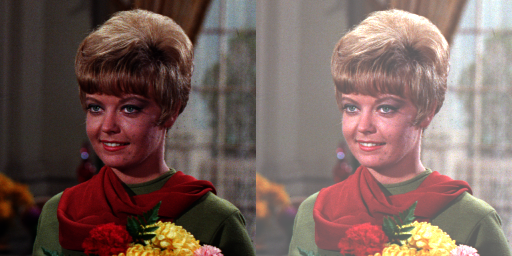

In [7]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness= int(input ('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)
#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c]=np.clip(original[y,x,c]+brightness,0, 255)

  #cara simple tanpa for loop
  #bringhtness_image = cv.convertScaleAbs(original, beta=brightness)
final_frame=cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Mengubah jadi Citra Negatif
--------------------------------


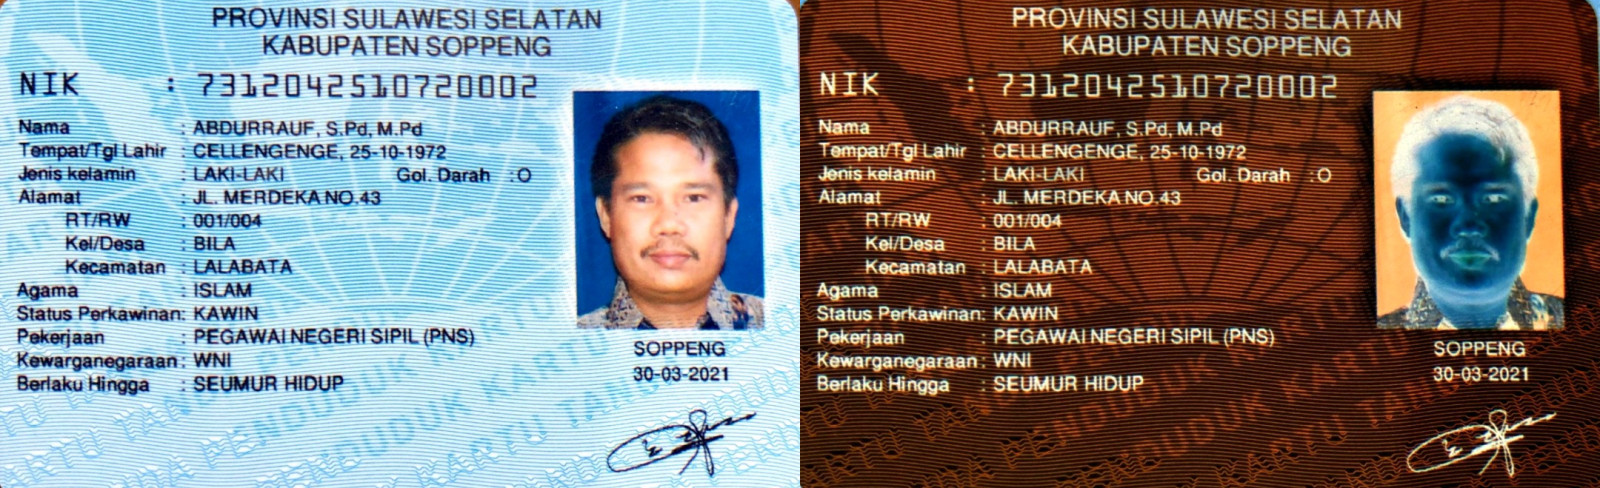

In [29]:
print('Mengubah jadi Citra Negatif')
print('--------------------------------')
original2 = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
inverse_image = np.zeros(original2.shape, original2.dtype)

for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    for c in range(original2.shape[2]):
      #menghasilkan citra negatif 255-original
      inverse_image[y,x,c] = np.clip(255 - original2[y,x,c], 0, 255)

final_frame_2 = cv.hconcat((original2, inverse_image))
cv2_imshow(final_frame_2)

 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah Citra lebih Kontras
--------------------------------
Masukan Nilai Kontras : 2
Masukan Nilai Brightness : 40


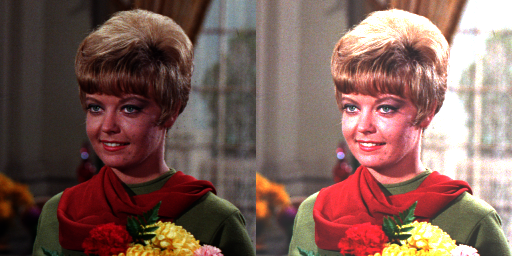

In [19]:
print('Mengubah Citra lebih Kontras')
print('--------------------------------')
try:
  contrast = int(input('Masukan Nilai Kontras : '))
  b = int(input('Masukan Nilai Brightness : ')) #b=brightness/tingkat cerahnya
except ValueError:
  print('Masukkan angka yang benar !')

contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      #seperti rumus operasi kontras 𝑔(𝑥, 𝑦) = 𝑎 ∗ 𝑓(𝑥, 𝑦) + b
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + b, 0, 255)

final_frame_3 = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame_3)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut

Implemen transformasi logarithmic brightness
--------------------------------------------
Masukkan Nilai Kecerahan : 55


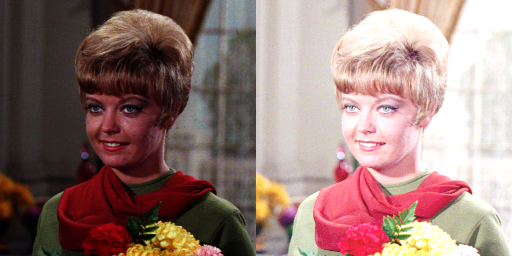

In [24]:
print('Implemen transformasi logarithmic brightness')
print('--------------------------------------------')
try:
  cons = int(input('Masukkan Nilai Kecerahan : '))
except ValueError:
  print('Masukkan angka yang benar !')

log_image = np.zeros(original.shape, original.dtype)

for x in range(original.shape[2]):
      log_image[:,:,x] = np.clip(cons * np.log(1 + original[:,:,x]), 0, 255)
      #Logarithmic Brightness s=c* log(1+r)


final_frame_4 = cv.hconcat((original, log_image))
cv2_imshow(final_frame_4)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

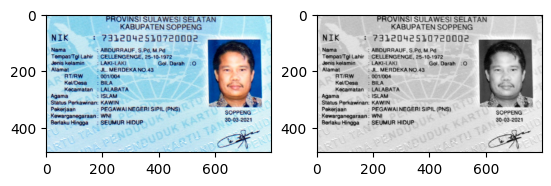

In [39]:
# A. AVERAGING
img = cv.cvtColor(original2 ,cv.COLOR_BGR2RGB)

#grayscale averaging
avg = np.mean(img, axis=2)

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(avg,cmap='gray')

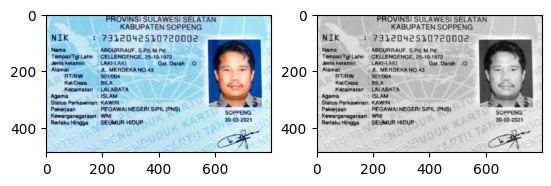

In [45]:
# Lightness
light_gray = np.mean(([np.max(img, axis=2), np.min(img, axis=2)]), axis=0)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(light_gray, cmap='gray')

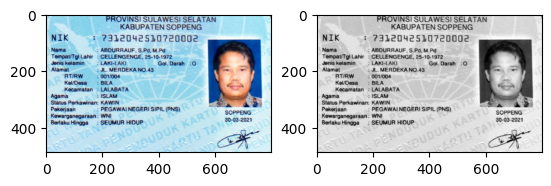

In [47]:
# C. LUMINANCE

r, g, b = cv.split(img)

lum_gray = 0.21 * r + 0.72 * g + 0.07 * b

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(lum_gray, cmap='gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

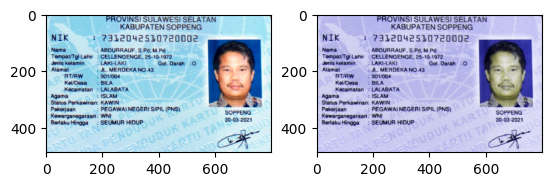

In [48]:
r, g, b = cv.split(img) #misahin saluran warna di img

test = 0.21 * r + 0.72 * g #ambil red dan green
test = test.astype(np.uint8)

test_blue = cv.merge([test, test, b])

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(test_blue, cmap='gray')